<h1> Introduction </h1>
**Customer segmentation** is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customers' demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices.

Benefits of customer segmentation include:  
1. *Personalisation*
    * Personalisation ensures that you provide exceptional customer experience.
2. *Customer Retention*
    * It is 16 times as costly to build a long-term business relationship with a new customer than simply to cultivate the loyalty of an existing customer.
3. *Better ROI for marketing*
    * Affirmations that right marketing messages are sent to the right people based on their life cycle stage.
4. *Reveal new opportunities*
    * Customer segmentation may reveal new trends about products and it may even give the first mover’s advantage in a product segment.

<h2> Approach - Machine Learning </h2>
Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.

There are some analytics techniques that can help you with segmenting your customers. These are useful especially when you have a large number of customers and it’s hard to discover patterns in your customer data just by looking at transactions. The two most common ones are:

1. Clustering
    * Clustering is an exploration technique for datasets where relationships between different observations may be too hard to spot with the eye.
2. Principal Component Analysis (PCA)
    * PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

The following code takes advantage of the Mall Customer Segmentation Data to demonstrate the ability of K-Means clustering algorithm to identify customer's segments.

In [5]:
# install.packages("skmeans")

In [4]:
## Importing packages
library(ggplot2); theme_set(theme_bw())
library(dplyr)
library(skmeans)
library(gridExtra)

## READ THE DATA
customers <- read.csv("data/Mall_Customers.csv")
attach(customers)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




Before we proceed, we have to make sure that the data is in the correct format so as to be used for modelling later on.

In [6]:
## CHECK THE DIMENSIONS OF THE DATA
dim(customers)
str(customers)

[1] 200   5

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


The data is just a mere sample of a larger amount of customers data. However, the purpose of this document is the familirisation of K-Means and unsupervised learning

Let us have a glimpe of the data before we dive in more depth.

In [7]:
## TAKE A LOOK OF THE DATA
head(customers)
colnames(customers)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

The data consists of

In [8]:
## UNIQUE CUSTOMERS
n_distinct(CustomerID)

[1] 200

Individual customers, where the majority pertains to women.

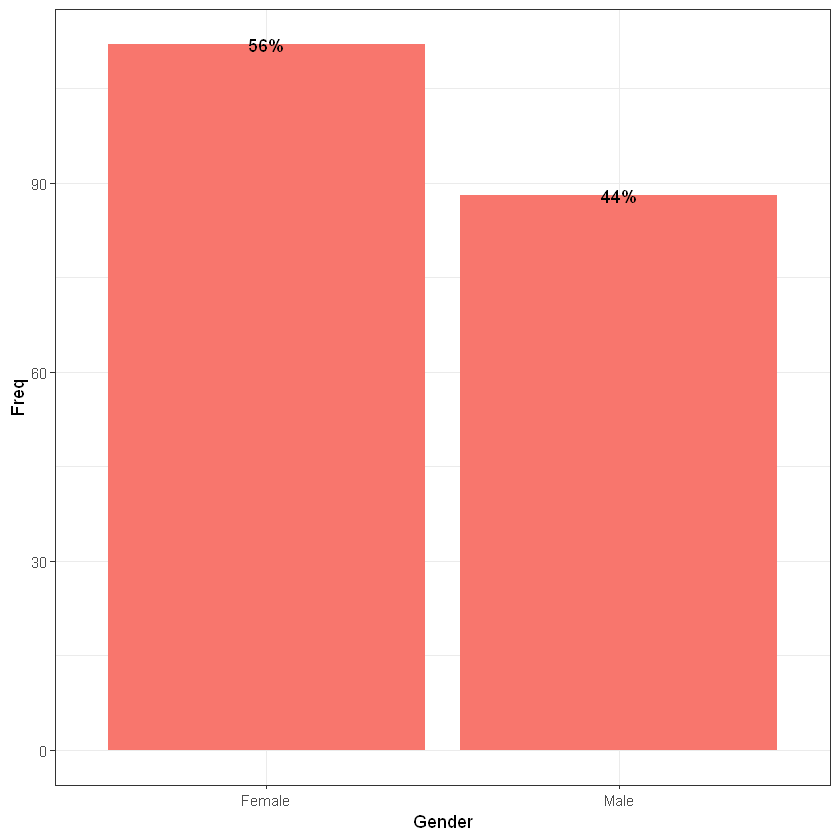

In [9]:
## GENDERS DISTRIBUTION
as.data.frame(table(Gender))  %>% 
    ggplot(aes(x = Gender, y = Freq))  +
    geom_bar(stat = "identity", fill = "#F8766D") +
    geom_text(y = as.vector(table(Gender)), label = paste0((as.vector(table(Gender))/sum(as.vector(table(Gender))))*100, "%"))

From a business perspective, most the companies that appear to have a successful story are extremely focuced on a particular target group so as to provide the best experience for them. Hence, businesses are primarly focused on such relevant activities. In addition, occasionally,  a business may select more than one segment as the focus of its activities, in which case, it would normally identify a primary target and a secondary target. Primary target markets are those market segments to which marketing efforts are primarily directed and where more of the business's resources are allocated, while secondary markets are often smaller segments or less vital to a product's success.

The *Age* variable would be a good indicator of the targeted Age groups.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

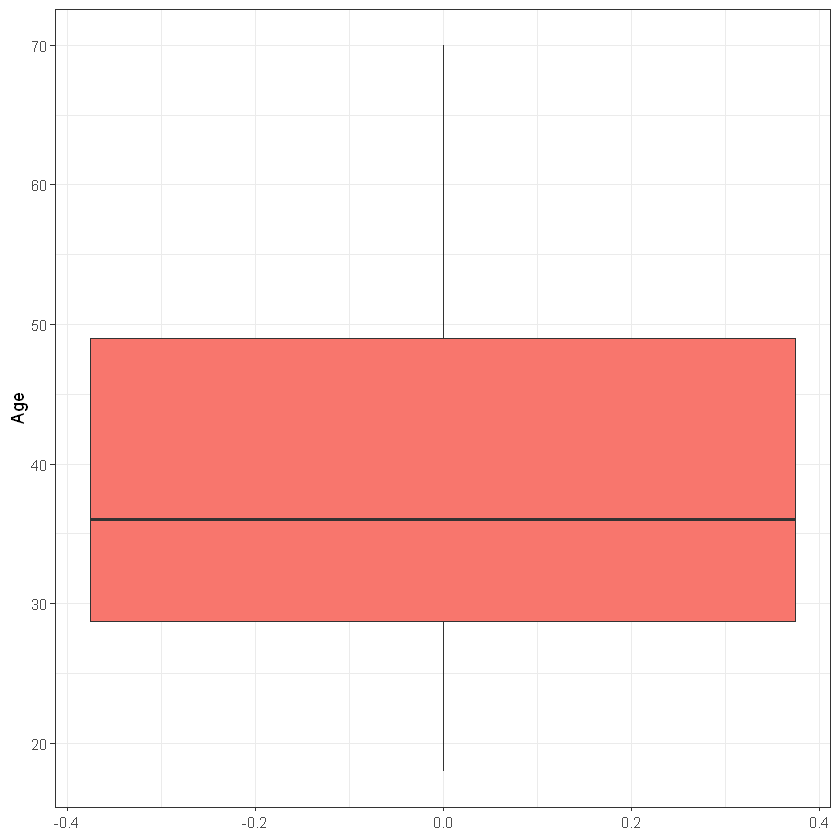

In [10]:
## SUMMARY OF THE AGE VARIABLE
summary(Age)
ggplot(as.data.frame(Age), aes(y = Age)) + geom_boxplot(fill='#F8766D')

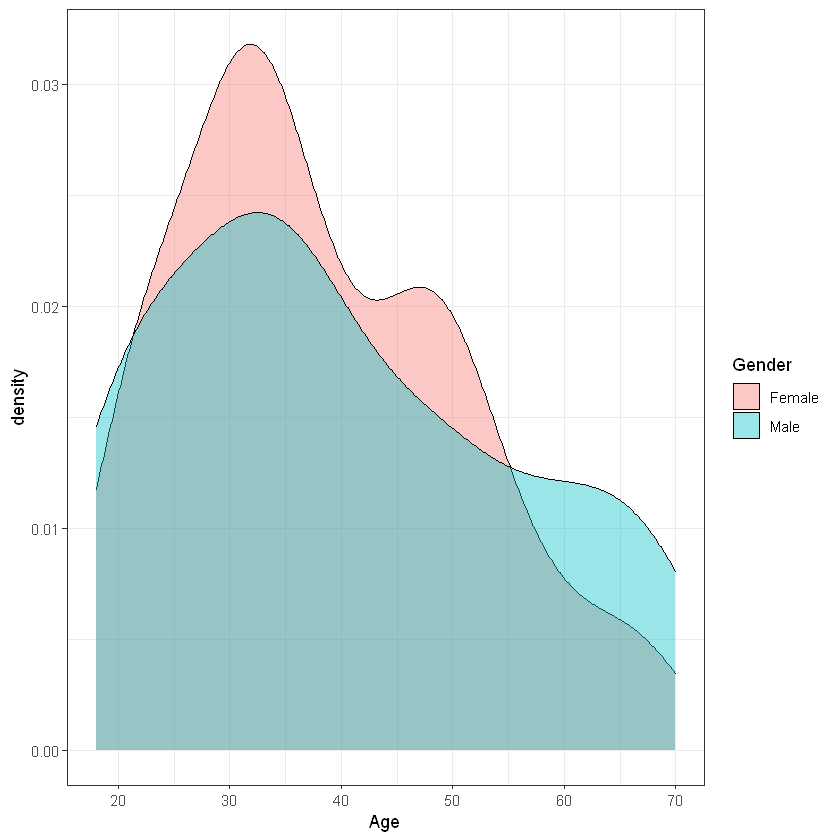

In [11]:
## AGE VARIABLE DISTRIBUTION
ggplot(customers, aes( x = Age, fill = Gender)) + geom_density(alpha = 0.4)

It is quite interesting that there is a difference between the two genders. It appears that in both groups (i.e. Males & Females) there is a strong activity at the ages 25-35, while the data shows another frequent group from the female part at the age of around 45 years old. In contrast, the group of men curve declines as the age reaches the maximum age of 70.

The income variable and the spending score variables are the ones that most interests us since we are going to keep this variables to perform our clustering. Investigating a little bit more on this variables we can see that they behave normally and not any anomalies are detected (1 data point at the Income variable is considered to be a correct value).

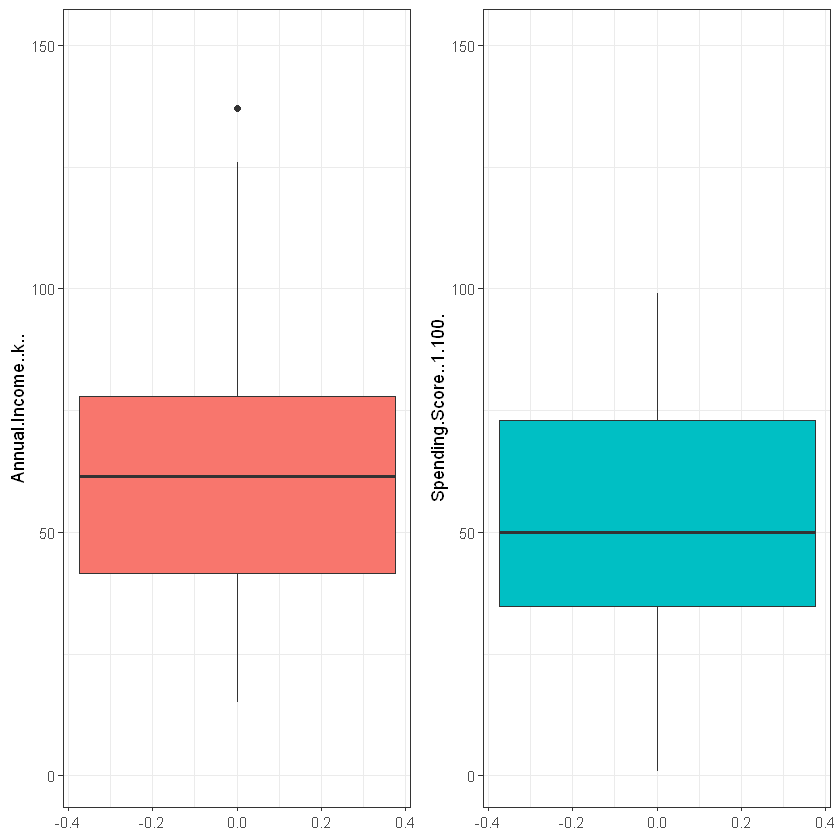

In [12]:
## ANNUAL INCOME AND SPENDING SCORE BOXPLOTS
p1 <- ggplot(as.data.frame(Annual.Income..k..), aes(y = Annual.Income..k..)) + geom_boxplot(fill='#F8766D') + ylim(c(1,150))
p2 <- ggplot(as.data.frame(Spending.Score..1.100.), aes(y = Spending.Score..1.100.)) + geom_boxplot(fill='#00BFC4') + ylim(c(1,150))
grid.arrange(p1, p2, ncol = 2)

FInally, the dataset does not contain any N/A values so no missing values techniques need to be applied for that reason. Our model is really sensitive in N/A values as will be discussed next.

In [13]:
## N/A VALUES
cat("There are", sum(is.na(customers)), "N/A values.")

There are 0 N/A values.

<h1> K-Means <h1/>

K-means clustering is an unsupervised machine learning algorithm for clustering ‘n’ observations into ‘k’ clusters where k is predefined or user-defined constant. The main idea is to define k centroids, one for each cluster.

The K-Means algorithm involves:
1. Choosing the number of clusters "k".
2. Randomly assign each point to a cluster
3. Until clusters stop changing, repeat the following:
    *     1.  For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster.
    *     2.  Assign each data point to the cluster for which the centroid is the closest.   

Two things are very important in K means, the first is to scale the variables before clustering the data *, and second is to look at a scatter plot or a data table to estimate the number of cluster centers to set for the k parameter in the model.

*Note:* Scaling is necessary when a distance between attributes is not sensible(i.e distance between Age and Height; different metrics are important too!). On the other hand, if you have attributes with a well-defined meaning(e.g. latitude and longitude) then you should not scale your data, because this will cause distortion.

Our hypothesis and the answer we are trying to give using k-means is that there is an intuition that customers can be grouped (clustered) according to their spending score given their income. My null hypothesis (which I am trying to disprove) is that there are no groups(clusters) of customers based on these.

In [22]:
## SAVE THE VARIABLES OF INTEREST
Kdata <- customers[,c(4,5)] # or 3,4,5
head(Kdata)

,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<int>,<int>
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
6,22,17,76


Determine the number of clusters using the Elbow approach

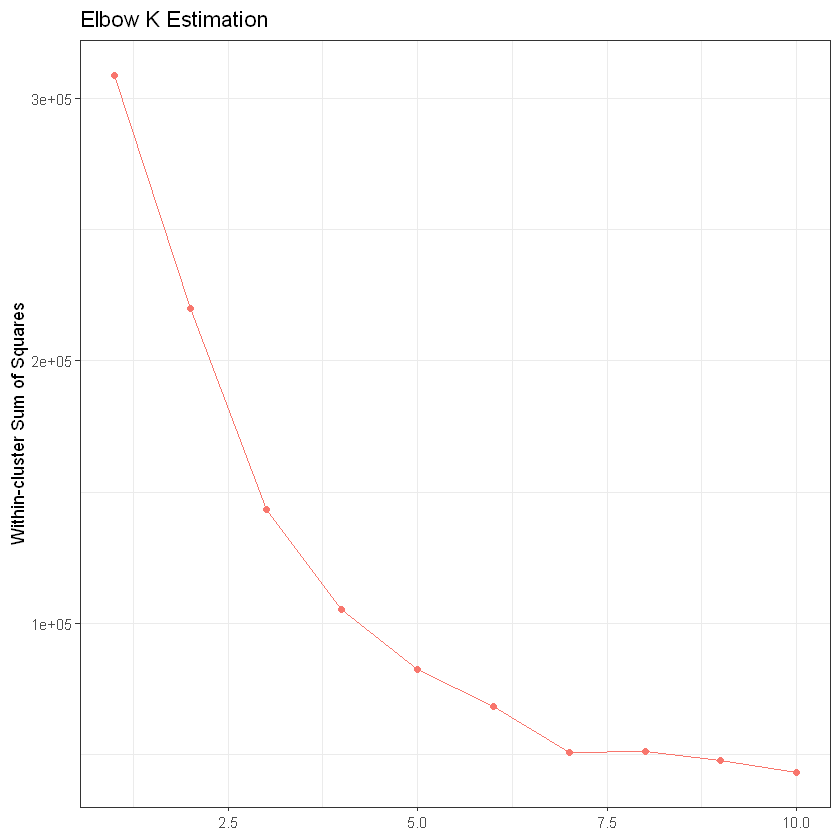

In [23]:
## K estimation using Elbow approach
set.seed(2022)
tot.withinss <- vector("numeric", length = 10)
for (i in 1:10){
    kDet <- kmeans(Kdata, i)
    tot.withinss[i] <- kDet$tot.withinss
}

ggplot(as.data.frame(tot.withinss), aes(x = seq(1,10), y = tot.withinss)) + 
    geom_point(col = "#F8766D") +    
    geom_line(col = "#F8766D") + 
    theme(axis.title.x.bottom = element_blank()) +
    ylab("Within-cluster Sum of Squares") +
    xlab("Number of Clusters") +
    ggtitle("Elbow K Estimation")

It can be seen from the graph above that a reasonable selection for the K value would be the k = 5. Hence, we are going to create 5 clusters to generate our segments.

In [24]:
## CLUSTER THE DATA
customerClusters <- kmeans(Kdata, 5)
customerClusters

K-means clustering with 5 clusters of sizes 39, 24, 50, 53, 34

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 32.69231           86.53846               82.12821
2 25.25000           25.83333               76.91667
3 54.06000           40.46000               36.72000
4 33.39623           58.05660               48.77358
5 41.64706           88.73529               16.76471

Clustering vector:
  [1] 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 3 2 3 2 3 2 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 4 3 4 4 3 3 3 3
 [75] 3 4 4 4 4 3 3 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 3 3 3
[112] 4 4 4 4 4 3 4 4 4 4 4 4 1 4 1 4 1 5 1 5 1 4 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1
[149] 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
[186] 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1

Within cluster sum of squares by cluster:
[1] 13972.359  6285.667 32399.320 13890.792 16060.500
 (between_SS / total_SS =  73.2 %)

Available comp

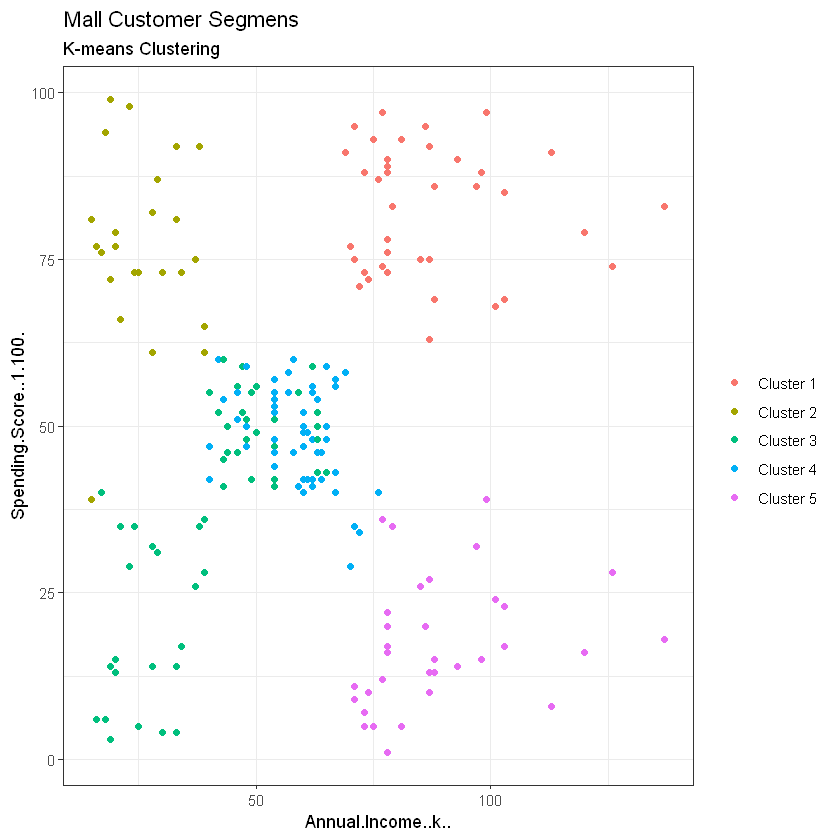

In [25]:
## VISULIASE THE CLUSTERS
ggplot(Kdata, aes(x = Annual.Income..k.., y = Spending.Score..1.100.)) + 
    geom_point(stat = "identity", aes(color = as.factor(customerClusters$cluster))) +
    scale_color_discrete(name=" ",
                         breaks=c("1", "2", "3", "4", "5"),
                         labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5")) +
    ggtitle("Mall Customer Segmens", subtitle = "K-means Clustering")

The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

*Cluster 1*. Customers with medium annual income and medium annual spend  
*Cluster 2.* Customers with high annual income and high annual spend  
*Cluster 3*. Customers with low annual income  and low annual spend  
*Cluster 4.* Customers with high annual income but low annual spend    
*Cluster 5.* Customers low annual income but high annual spend

Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.

We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 2 variables — income and spend. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.

<h1>References</h1>
[Clustering Algorithms for Customer Segmentation](http://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac)  
[Customer Segmentation Theoy](http://searchsalesforce.techtarget.com/definition/customer-segmentation)  
[Benefits of Customer Segmentation](http://postfunnel.com/4-benefits-customer-segmentation-higher-profitability/)  
[K-Means Clustering in R](http://www.datasciencecentral.com/profiles/blogs/find-marketing-clusters-in-20-minutes-in-r)  
[Principal Component Analysis](http://en.wikipedia.org/wiki/Principal_component_analysis)